In [1]:
!pip install numpy tensorflow_datasets tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow_datasets as tfds
df_train, df_valid, df_test = tfds.load(
    name='titanic',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    as_supervised=True
)

In [3]:
for x, y in df_train.take(1):
    print(f"{x=}")
    print(f"{y=}")

x={'age': <tf.Tensor: shape=(), dtype=float32, numpy=30.0>, 'boat': <tf.Tensor: shape=(), dtype=string, numpy=b'Unknown'>, 'body': <tf.Tensor: shape=(), dtype=int32, numpy=-1>, 'cabin': <tf.Tensor: shape=(), dtype=string, numpy=b'Unknown'>, 'embarked': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'fare': <tf.Tensor: shape=(), dtype=float32, numpy=13.0>, 'home.dest': <tf.Tensor: shape=(), dtype=string, numpy=b'Sarnia, ON'>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'McCrie, Mr. James Matthew'>, 'parch': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'pclass': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'sex': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'sibsp': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'ticket': <tf.Tensor: shape=(), dtype=string, numpy=b'233478'>}
y=<tf.Tensor: shape=(), dtype=int64, numpy=0>


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
import tensorflow_datasets as tfds
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(18, 5)})
import plotly.express as px

In [5]:
from keras import layers
from keras import activations
from keras import optimizers

In [6]:
from keras import metrics
from keras import losses

In [7]:
for x, y in df_train.take(1):
    print(f"{x=}")
    print('\n')
    print(f"{y=}")

x={'age': <tf.Tensor: shape=(), dtype=float32, numpy=30.0>, 'boat': <tf.Tensor: shape=(), dtype=string, numpy=b'Unknown'>, 'body': <tf.Tensor: shape=(), dtype=int32, numpy=-1>, 'cabin': <tf.Tensor: shape=(), dtype=string, numpy=b'Unknown'>, 'embarked': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'fare': <tf.Tensor: shape=(), dtype=float32, numpy=13.0>, 'home.dest': <tf.Tensor: shape=(), dtype=string, numpy=b'Sarnia, ON'>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'McCrie, Mr. James Matthew'>, 'parch': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'pclass': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'sex': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'sibsp': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'ticket': <tf.Tensor: shape=(), dtype=string, numpy=b'233478'>}


y=<tf.Tensor: shape=(), dtype=int64, numpy=0>


In [8]:
df_x_train = pd.DataFrame([i[0] for i in df_train.as_numpy_iterator()])
df_x_val = pd.DataFrame([i[0] for i in df_valid.as_numpy_iterator()])
df_x_test = pd.DataFrame([i[0] for i in df_test.as_numpy_iterator()])

df_y_train = pd.DataFrame([i[1] for i in df_train.as_numpy_iterator()])
df_y_val = pd.DataFrame([i[1] for i in df_valid.as_numpy_iterator()])
df_y_test = pd.DataFrame([i[1] for i in df_test.as_numpy_iterator()])


**Описание датафрейма:**


Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

Name — имя;

Sex — пол;

Age — возраст;

SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

Parch — количество родителей, детей (в том числе приемных) на борту титаника;

Ticket — номер билета;

Fare — плата за проезд;

Cabin — каюта;

Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

В поле Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [9]:
df_x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1047 non-null   float32
 1   boat       1047 non-null   object 
 2   body       1047 non-null   int32  
 3   cabin      1047 non-null   object 
 4   embarked   1047 non-null   int64  
 5   fare       1047 non-null   float32
 6   home.dest  1047 non-null   object 
 7   name       1047 non-null   object 
 8   parch      1047 non-null   int32  
 9   pclass     1047 non-null   int64  
 10  sex        1047 non-null   int64  
 11  sibsp      1047 non-null   int32  
 12  ticket     1047 non-null   object 
dtypes: float32(2), int32(3), int64(3), object(5)
memory usage: 86.0+ KB


In [10]:
# Получим единые датафреймы признаков и меток класса
x_frames = [df_x_train, df_x_val, df_x_test]
df_x = pd.concat(x_frames)
y_frames = [df_y_train, df_y_val, df_y_test]
df_y = pd.concat(y_frames)
df = pd.concat([df_x, df_y], axis = 1)

In [11]:
# Преобразуем к привычному виду строки
df[['boat', 'cabin', 'home.dest', 'name', 'ticket']] = \
df[['boat', 'cabin', 'home.dest', 'name', 'ticket']].apply(lambda x: x.str.decode('utf-8'))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 130
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1309 non-null   float32
 1   boat       1309 non-null   object 
 2   body       1309 non-null   int32  
 3   cabin      1309 non-null   object 
 4   embarked   1309 non-null   int64  
 5   fare       1309 non-null   float32
 6   home.dest  1309 non-null   object 
 7   name       1309 non-null   object 
 8   parch      1309 non-null   int32  
 9   pclass     1309 non-null   int64  
 10  sex        1309 non-null   int64  
 11  sibsp      1309 non-null   int32  
 12  ticket     1309 non-null   object 
 13  0          1309 non-null   int64  
dtypes: float32(2), int32(3), int64(4), object(5)
memory usage: 127.8+ KB


Видим пропуски и некорректные данные в 5 столбцах. Идем смотреть что там

In [13]:
print(df.boat.isna().any())
print(df.boat.isnull().any())

False
False


In [14]:
df

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,ticket,0
0,30.0,Unknown,-1,Unknown,2,13.0000,"Sarnia, ON","McCrie, Mr. James Matthew",0,1,0,0,233478,0
1,37.0,Unknown,98,Unknown,2,7.9250,"Ruotsinphytaa, Finland New York, NY","Gustafsson, Mr. Anders Vilhelm",0,2,0,2,3101276,0
2,28.0,9,-1,Unknown,2,13.0000,Spain,"Reynaldo, Ms. Encarnacion",0,1,1,0,230434,1
3,18.0,Unknown,-1,Unknown,2,73.5000,"Lyndhurst, England","Davies, Mr. Charles Henry",0,1,0,0,S.O.C. 14879,0
4,-1.0,Unknown,-1,Unknown,0,7.8958,Unknown,"Gheorgheff, Mr. Stanio",0,2,0,0,349254,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,32.0,Unknown,-1,Unknown,1,7.7500,"Ireland New York, NY","Dooley, Mr. Patrick",0,2,0,0,370376,0
127,19.0,Unknown,-1,Unknown,2,7.7750,"Myren, Sweden New York, NY","Gustafsson, Mr. Karl Gideon",0,2,0,0,347069,0
128,-1.0,Unknown,-1,Unknown,1,8.1375,Unknown,"Peters, Miss. Katie",0,2,1,0,330935,0
129,31.0,C D,-1,Unknown,2,20.5250,"Strood, Kent, England Detroit, MI","Goldsmith, Mrs. Frank John (Emily Alice Brown)",1,2,1,1,363291,1


In [15]:
for name in ['boat', 'cabin', 'home.dest']:
    print(f"\t {name} = {len(df[df[name] == 'Unknown'])}")

	 boat = 823
	 cabin = 1014
	 home.dest = 564


In [16]:
df.boat.unique()

array(['Unknown', '9', '11', '3', '16', '6', '15', '4', '13', '10', '14',
       '5', '12', '8', 'D', 'A', 'C', 'B', '5 7', 'C D', '7', '2', '1',
       '13 15', '15 16', '5 9', '13 15 B', '8 10'], dtype=object)

In [17]:
df.loc[df['cabin'] == 'Unknown', 'cabin'] = -1

In [18]:
df.loc[df['boat'] == 'Unknown', 'boat'] = -1

In [19]:
df

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,ticket,0
0,30.0,-1,-1,-1,2,13.0000,"Sarnia, ON","McCrie, Mr. James Matthew",0,1,0,0,233478,0
1,37.0,-1,98,-1,2,7.9250,"Ruotsinphytaa, Finland New York, NY","Gustafsson, Mr. Anders Vilhelm",0,2,0,2,3101276,0
2,28.0,9,-1,-1,2,13.0000,Spain,"Reynaldo, Ms. Encarnacion",0,1,1,0,230434,1
3,18.0,-1,-1,-1,2,73.5000,"Lyndhurst, England","Davies, Mr. Charles Henry",0,1,0,0,S.O.C. 14879,0
4,-1.0,-1,-1,-1,0,7.8958,Unknown,"Gheorgheff, Mr. Stanio",0,2,0,0,349254,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,32.0,-1,-1,-1,1,7.7500,"Ireland New York, NY","Dooley, Mr. Patrick",0,2,0,0,370376,0
127,19.0,-1,-1,-1,2,7.7750,"Myren, Sweden New York, NY","Gustafsson, Mr. Karl Gideon",0,2,0,0,347069,0
128,-1.0,-1,-1,-1,1,8.1375,Unknown,"Peters, Miss. Katie",0,2,1,0,330935,0
129,31.0,C D,-1,-1,2,20.5250,"Strood, Kent, England Detroit, MI","Goldsmith, Mrs. Frank John (Emily Alice Brown)",1,2,1,1,363291,1


In [20]:
# Сформируем признак "количество родственников на борту"
df['family_size'] = df['parch'] + df['sibsp']

In [21]:
df['status'] = 0
for i in df:
    df['status']=df['name'].str.extract('([A-Za-z]+)\.') # выделим обращения

# Заменим редкие обращения по смыслу
df['status'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],\
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],\
    inplace=True)

In [22]:
df.drop(['home.dest', 'name','ticket'], axis=1, inplace=True)

In [23]:
df

,age,boat,body,cabin,embarked,fare,parch,pclass,sex,sibsp,0,family_size,status
0,30.0,-1,-1,-1,2,13.0000,0,1,0,0,0,0,Mr
1,37.0,-1,98,-1,2,7.9250,0,2,0,2,0,2,Mr
2,28.0,9,-1,-1,2,13.0000,0,1,1,0,1,0,Miss
3,18.0,-1,-1,-1,2,73.5000,0,1,0,0,0,0,Mr
4,-1.0,-1,-1,-1,0,7.8958,0,2,0,0,0,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,32.0,-1,-1,-1,1,7.7500,0,2,0,0,0,0,Mr
127,19.0,-1,-1,-1,2,7.7750,0,2,0,0,0,0,Mr
128,-1.0,-1,-1,-1,1,8.1375,0,2,1,0,0,0,Miss
129,31.0,C D,-1,-1,2,20.5250,1,2,1,1,1,2,Mrs


In [24]:
df.status.unique()

array(['Mr', 'Miss', 'Mrs', 'Master', 'Other', 'Dona'], dtype=object)

In [25]:
df.loc[df['status'] == 'Mr', 'status'] = 1
df.loc[df['status'] == 'Miss', 'status'] = 2
df.loc[df['status'] == 'Mrs', 'status'] = 3
df.loc[df['status'] == 'Master', 'status'] = 4
df.loc[df['status'] == 'Dona', 'status'] = 5
df.loc[df['status'] == 'Other', 'status'] = 6

In [26]:
# Для удобства переименуем столбец с метками классов, сбросим индекс (чтобы не было повторений)
df = df.rename(columns={0: 'survived'})
df.reset_index(inplace=True, drop=True)

<Figure size 1000x1000 with 0 Axes>

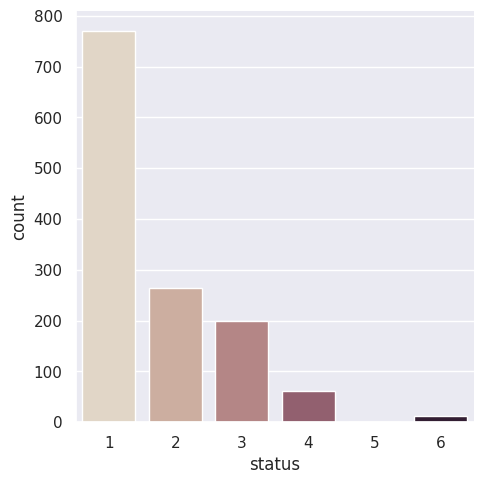

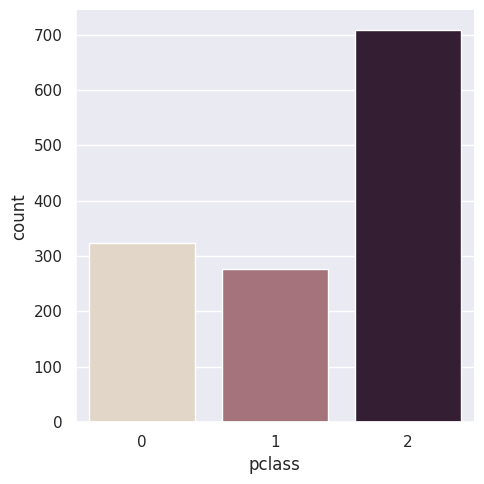

In [27]:
figure = plt.figure(figsize = (10, 10))
sns.catplot(data=df, x="status", kind="count", palette="ch:.25")
sns.catplot(data=df, x="pclass", kind="count", palette="ch:.25")

<Axes: xlabel='fare', ylabel='Count'>

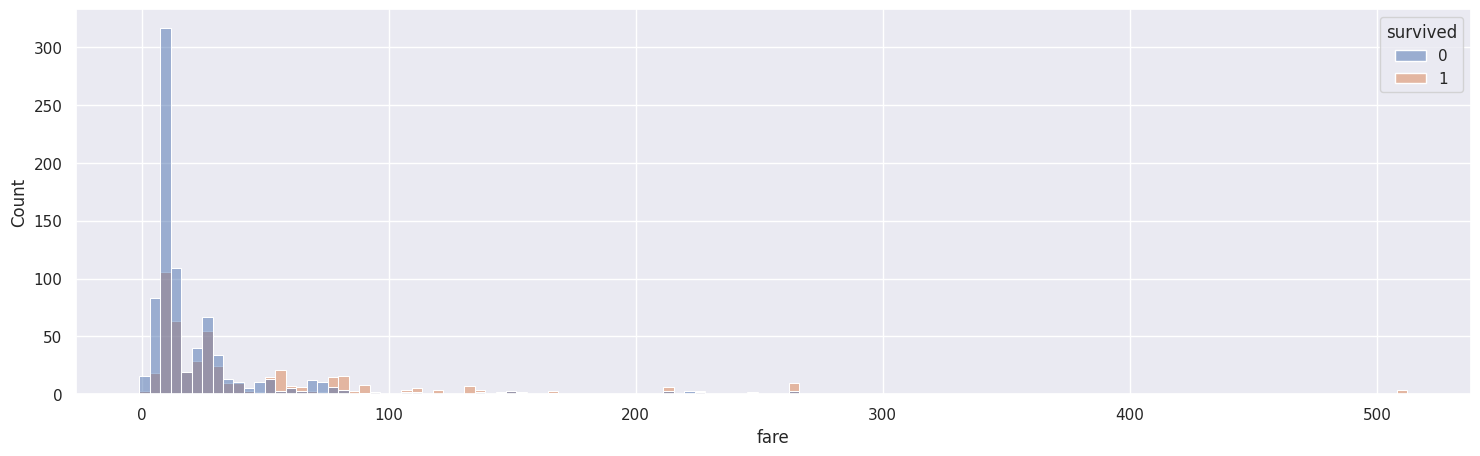

In [28]:
sns.histplot(data = df, x = 'fare', hue = 'survived')

<Axes: xlabel='age', ylabel='Count'>

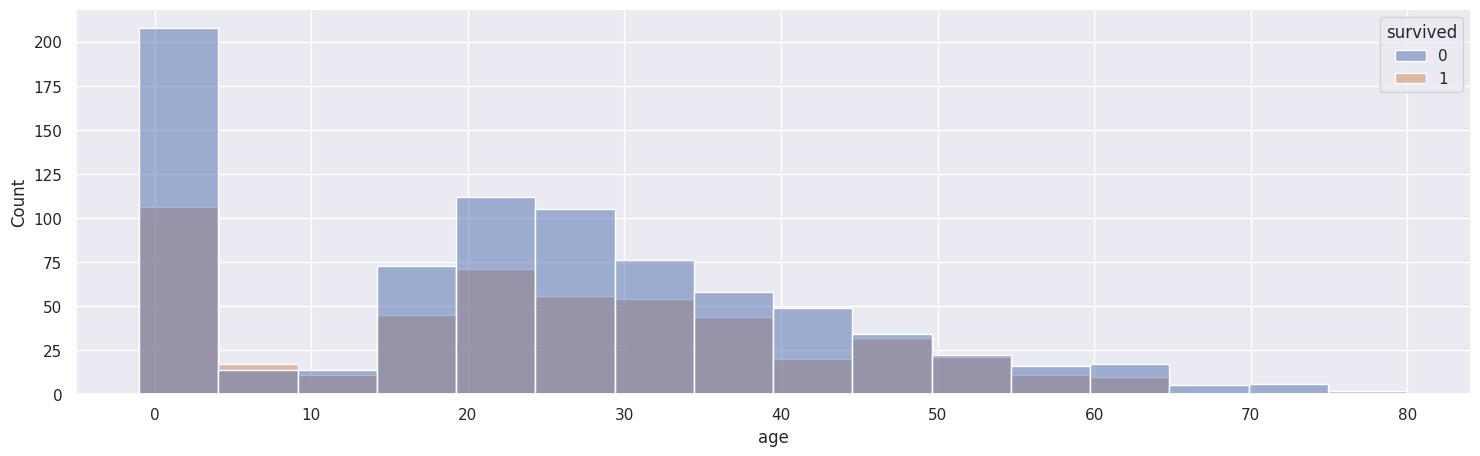

In [29]:
sns.histplot(data = df, x = 'age', hue = 'survived')

<Axes: >

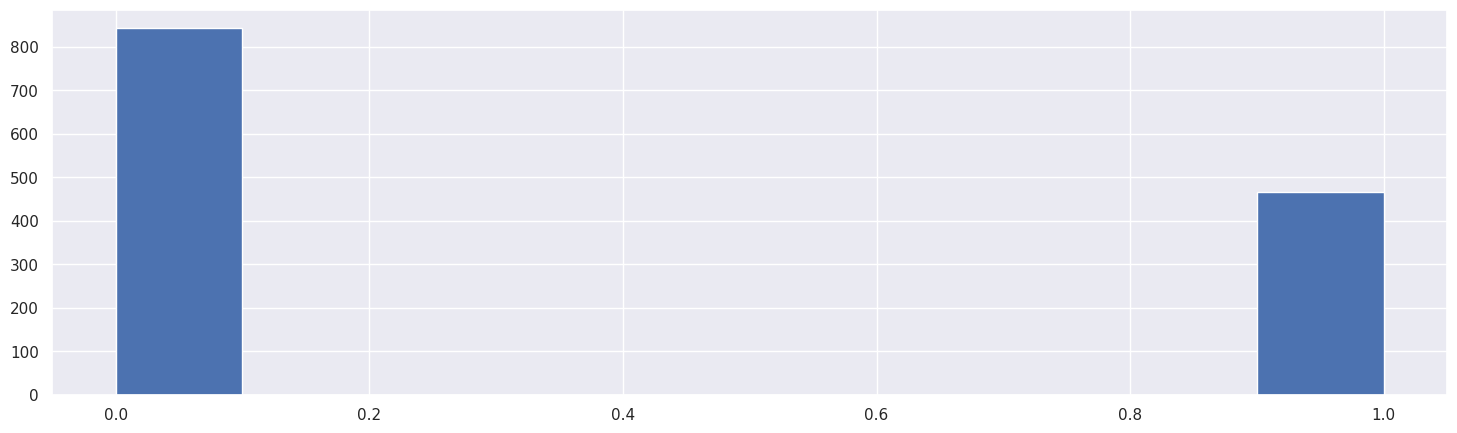

In [30]:
df.sex.hist()

Мужчин было на борту больше, чем женщин

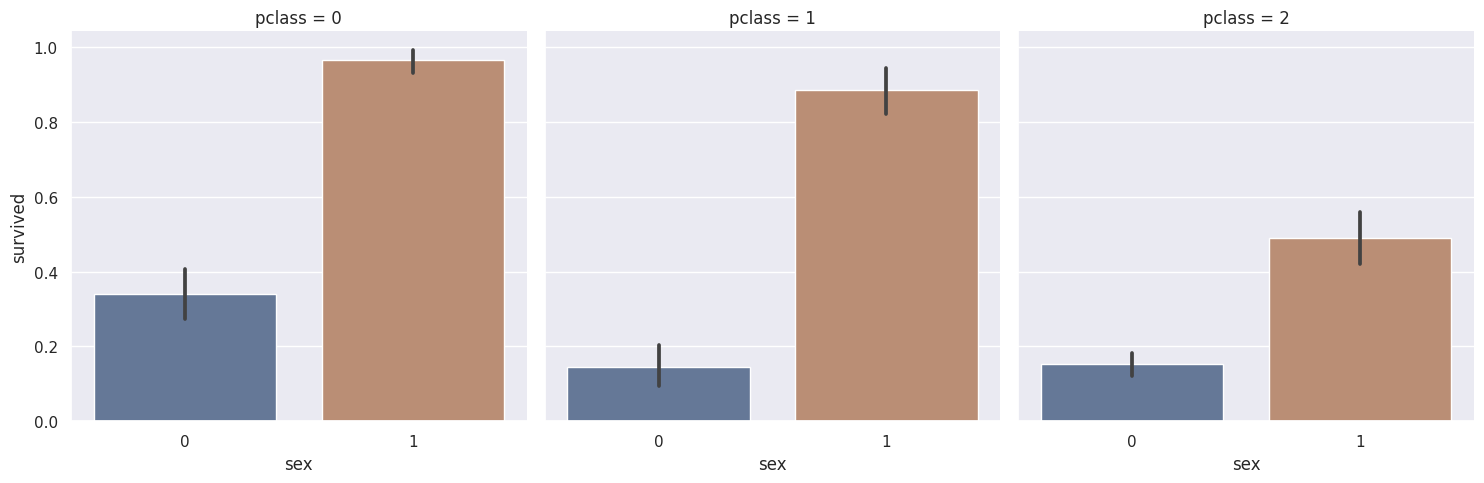

In [31]:
sns.catplot(data = df,y='survived',x='sex',col='pclass',
            kind='bar', saturation=0.5)

Во всех классах женщины спаслись больше мужчин, это говорит о героизме мужчин на борту. Получается, уступали места женщинам в лодках

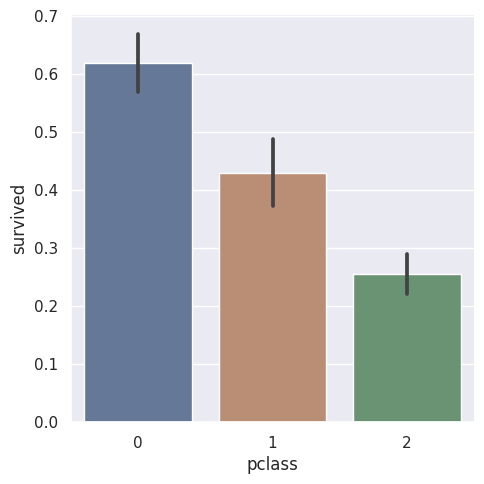

In [32]:
sns.catplot(data = df,y='survived',x='pclass',
            kind='bar', saturation=0.5)

Тут мы видим, что бедный класс спасался чаще, чем богатый

Ранее запускала код, поэтому длины у массивов следующие:

In [33]:
train_len, val_len, test_len = 1047, 131, 131

In [34]:
train_len

1047

In [35]:
df.fare

0       13.0000
1        7.9250
2       13.0000
3       73.5000
4        7.8958
         ...   
1304     7.7500
1305     7.7750
1306     8.1375
1307    20.5250
1308    27.7500
Name: fare, Length: 1309, dtype: float32

In [36]:
input_shape = (8, )
batch_size = 30
amount_of_classes = 2

In [37]:
df.family_size.unique()

array([ 0,  2,  1,  3,  6,  4, 10,  5,  7], dtype=int32)

In [38]:
# заполняем сначала значения нового признака нулями, далее разбиваем данные на 4 категории
df['age_cat'] = 0
df.loc[df['age'] <= 21, 'age_cat'] = 0
df.loc[(df['age'] > 21) & (df['age'] <= 28), 'age_cat'] = 1
df.loc[(df['age'] > 28) & (df['age'] <= 39), 'age_cat'] = 2
df.loc[(df['age'] > 39) & (df['age'] <= 80), 'age_cat'] = 3
df.drop(['age'], axis=1, inplace=True)

In [39]:
df = df.drop(columns = ['boat','cabin','sibsp','parch','body'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   embarked     1309 non-null   int64  
 1   fare         1309 non-null   float32
 2   pclass       1309 non-null   int64  
 3   sex          1309 non-null   int64  
 4   survived     1309 non-null   int64  
 5   family_size  1309 non-null   int32  
 6   status       1309 non-null   object 
 7   age_cat      1309 non-null   int64  
dtypes: float32(1), int32(1), int64(5), object(1)
memory usage: 71.7+ KB


In [41]:
df['status_new'] = df['status'].astype(int)
df = df.drop(columns = ['status'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   embarked     1309 non-null   int64  
 1   fare         1309 non-null   float32
 2   pclass       1309 non-null   int64  
 3   sex          1309 non-null   int64  
 4   survived     1309 non-null   int64  
 5   family_size  1309 non-null   int32  
 6   age_cat      1309 non-null   int64  
 7   status_new   1309 non-null   int64  
dtypes: float32(1), int32(1), int64(6)
memory usage: 71.7 KB


In [43]:
ds_train = df.iloc[:train_len, :]
ds_validation = df.iloc[train_len: train_len + val_len]
ds_test = df.iloc[train_len + val_len: train_len + val_len + test_len]

In [44]:
# Эти массивы нам пригодятся в дальнейшем
X_train_np = ds_train.drop(columns = ['survived']).to_numpy()
y_train_np = ds_train['survived'].to_numpy()

X_test_np = ds_test.drop(columns = ['survived']).to_numpy()
y_test_np = ds_test['survived'].to_numpy()

In [45]:
ds_train.columns

Index(['embarked', 'fare', 'pclass', 'sex', 'survived', 'family_size',
       'age_cat', 'status_new'],
      dtype='object')

In [ ]:

x_col = ['fare', 'age_cat', 'embarked_0', 'embarked_1', 'embarked_2',
       'embarked_3', 'pclass_0', 'pclass_1', 'pclass_2', 'sex_0', 'sex_1',
       'mr_mrs_Dona', 'mr_mrs_Master', 'mr_mrs_Miss', 'mr_mrs_Mr',
       'mr_mrs_Mrs', 'mr_mrs_Other', 'family_size_0', 'family_size_1',
       'family_size_2', 'family_size_3', 'family_size_4', 'family_size_5',
       'family_size_6', 'family_size_7', 'family_size_10']
y_col = ['survived']

X_train_np = ds_train.loc[:, x_col].to_numpy()
y_train_np = ds_train['survived'].to_numpy()

X_test_np = ds_test.loc[:, x_col].to_numpy()
y_test_np = ds_test['survived'].to_numpy()

In [48]:

X_train_np = ds_train.loc[:].to_numpy()
y_train_np = ds_train['survived'].to_numpy()

X_test_np = ds_test.loc[:].to_numpy()
y_test_np = ds_test['survived'].to_numpy()

In [49]:
#X_test_np = ds_test.loc[:].to_numpy()
#y_test_np = ds_test['survived'].to_numpy()

# Перейдем обратно к тензорам
ds_train = tf.data.Dataset.from_tensor_slices((ds_train.loc[:], ds_train['survived']))
ds_validation = tf.data.Dataset.from_tensor_slices((ds_validation.loc[:], ds_validation['survived']))
ds_test = tf.data.Dataset.from_tensor_slices((ds_test.loc[:], ds_test['survived']))

# Сформируем словари
ds_train = ds_train.map(lambda x, y: {'description': x, 'label': y})
ds_validation = ds_validation.map(lambda x, y: {'description': x, 'label': y})
ds_test = ds_test.map(lambda x, y: {'description': x, 'label': y})


def convert_ds(sample):
    '''
    Функция для формирования тензора
    sample: MapDataset tensorflow
    '''
    return sample['description'], sample['label']

ds_train = ds_train.map(convert_ds)
ds_validation = ds_validation.map(convert_ds)
ds_test = ds_test.map(convert_ds)

In [50]:
examples = ds_train.as_numpy_iterator()
examples = [examples.next() for _ in range(1)]

# Сведения о первом пассажире тренировочного набора
features = [i[0] for i in examples]
classes = [i[1] for i in examples]

print(features)
print(classes)

[array([ 2., 13.,  1.,  0.,  0.,  0.,  2.,  1.])]
[0]


In [51]:
input_shape = (8, )     # Наши данные - одномерный массив с размерностью 8
batch_size = 10
amount_of_classes = 2

In [52]:
# Закодируем метки классов с помощью one-hot кодирования, также поделим каждый из наборов на батчи

def make_one_hot(x, y):

    return x, tf.one_hot(y, depth = amount_of_classes)

# Выполняем преобразования в каждом наборе
ds_train = (
    ds_train
    .map(make_one_hot)
    .shuffle(len(ds_train))
    .batch(batch_size, drop_remainder = True)
)

ds_validation = (
    ds_validation
    .map(make_one_hot)
    .shuffle(len(ds_validation))
    .batch(batch_size, drop_remainder = True)
)

ds_test = (
    ds_test
    .map(make_one_hot)
    .shuffle(len(ds_test))
    .batch(batch_size, drop_remainder = True)
)

In [53]:
# Инициализируем модель
model = keras.Sequential()
model.add(layers.InputLayer(input_shape = input_shape, batch_size = batch_size))

# Добавляем слои, указав количество нейронов, функцию активации
model.add(layers.Dense(64, activation = activations.sigmoid))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(8, activation = 'sigmoid'))

# Последний слой активируем с помощью сигмоиды (для бинарной классификации)
model.add(layers.Dense(amount_of_classes, activation = activations.sigmoid))


model.compile(
    optimizer = optimizers.Adam(learning_rate = 0.001),
    loss = losses.CategoricalCrossentropy(),
    metrics = [metrics.PrecisionAtRecall(0.9)]
#     metrics = [metrics.CategoricalAccuracy()]
)

In [54]:
model_ten = model.fit(ds_train, epochs = 20, validation_data = ds_validation, batch_size = batch_size, verbose = 0 )

In [55]:
print(model_ten.history)

{'loss': [0.821864128112793, 0.658375084400177, 0.6218685507774353, 0.505405068397522, 0.2975933849811554, 0.16455958783626556, 0.08406736701726913, 0.05217370763421059, 0.03722052276134491, 0.04036664590239525, 0.02355233021080494, 0.019165951758623123, 0.01620924100279808, 0.01394282653927803, 0.012135653756558895, 0.010662127286195755, 0.009466311894357204, 0.008478195406496525, 0.00758901983499527, 0.006860287394374609], 'precision_at_recall': [0.5014563202857971, 0.5154207944869995, 0.5941140651702881, 0.7423167824745178, 0.9623218178749084, 0.9968085289001465, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.6889693737030029, 0.6829410195350647, 0.589510977268219, 0.4191209673881531, 0.1894836127758026, 0.10165272653102875, 0.06191829591989517, 0.0384381003677845, 0.030204223468899727, 0.023817751556634903, 0.019282162189483643, 0.015936721116304398, 0.01381222065538168, 0.012012600898742676, 0.010577450506389141, 0.009249798022210598, 0.00830

In [56]:
df_mod = pd.DataFrame(model_ten.history)
df_mod

,loss,precision_at_recall,val_loss,val_precision_at_recall
0,0.821864,0.501456,0.688969,0.504202
1,0.658375,0.515421,0.682941,0.534483
2,0.621869,0.594114,0.589511,0.653631
3,0.505405,0.742317,0.419121,0.855072
4,0.297593,0.962322,0.189484,0.992248
5,0.164560,0.996809,0.101653,1.000000
6,0.084067,1.000000,0.061918,1.000000
7,0.052174,1.000000,0.038438,1.000000
8,0.037221,1.000000,0.030204,1.000000
9,0.040367,1.000000,0.023818,1.000000


<Axes: >

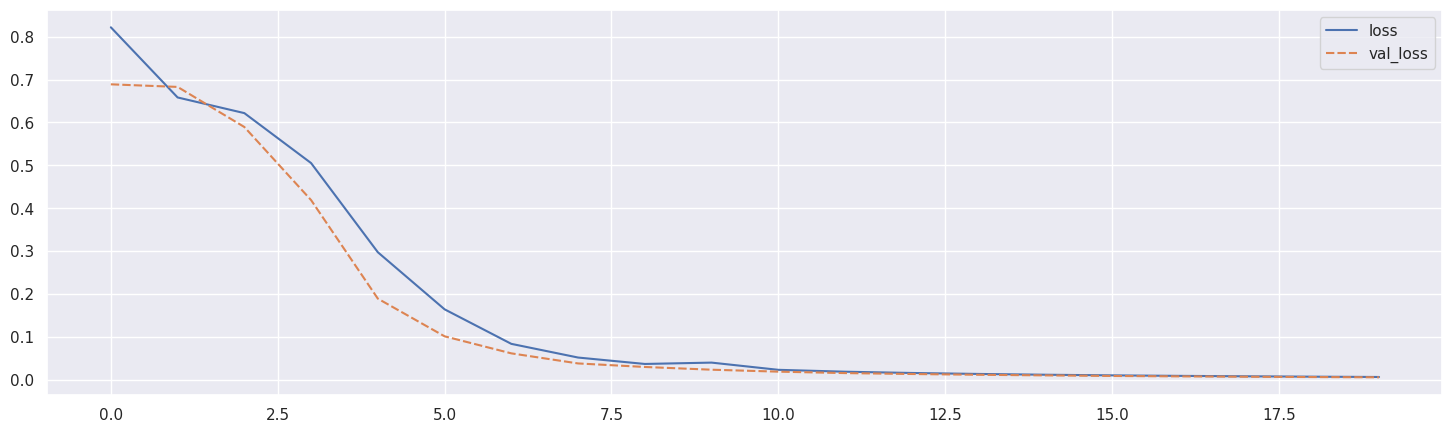

In [57]:
sns.lineplot(data=df_mod[['loss', 'val_loss']])

<Axes: >

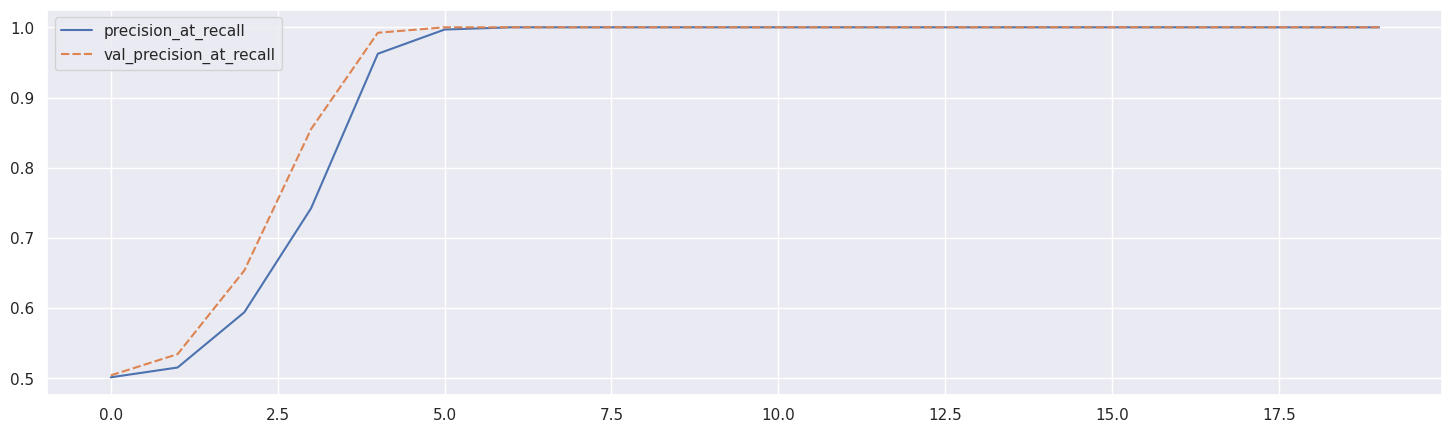

In [58]:
sns.lineplot(data=df_mod[['precision_at_recall', 'val_precision_at_recall']])

In [59]:
# Перейдем к знакомым нам массивам, чтобы рассчитать метрики оценки качества
results = tf.nn.softmax(model(X_test_np)).numpy()

# Сопоставим каждому объекту окончательную метку класса на основе предсказанной сетью вероятности
def calculate_class(results):
    y_pred_test = []
    for i in results:
        if i[0] > 0.5:
            y_pred_test.append(0)
        else:
            y_pred_test.append(1)
    return np.array(y_pred_test)

y_pred_test = calculate_class(results)

f1 = f1_score(y_pred_test, y_test_np, average ='macro')
print(f'f1-score на тестовом наборе составила: {round(f1, 3)}')

f1-score на тестовом наборе составила: 1.0


Это, безусловно, можно назвать максимально возможной оценкой f1 :D , но почему так вышло и в каком моменте модель переобучилась (или что-то пошло не так) - я ещё разбираюсь